## Ejercicio 1. Hacemos un análisis diferenciado del dataset del Titanic

1_ Usando el dataset del Titanic (train.csv) vamos a crear cuatro datasets distintos para hacer estudios diferenciados entre subgrupos de la tribulación: entre mujeres y hombres y menores o igual a 20 y mayores de 20 años, {femaleu20,femaleo20,maleu20,maleo20}. 

2_ De estos cuatro datasets, cuente la cantidad de casillas incompletas ¿cuál es el mas completo y cuál el menos completo?

3_ Hacer la limpieza del dataset que les tocó y calcular la estadísticas de resumen. Los estudiantes con DNI terminados en {1-2,3-4-5,6-7,8-9-0} trabajarán con {femaleu20,femaleo20,maleu20,maleo20}.

4_ Construya el dataset _datos_corruptos_ con todos los datos que tienen casillas incompletas. Determine la fracción de estos datos que corresponden a los cuatro grupos definidos anteriormente.

1_ Usando el dataset del Titanic (train.csv) vamos a crear cuatro datasets distintos para hacer estudios diferenciados entre subgrupos de la tribulación: entre mujeres y hombres y menores o igual a 20 y mayores de 20 años, {femaleu20,femaleo20,maleu20,maleo20}.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
df_original=pd.read_csv(
    'train.csv'
)
#realizamos una copia para no tocar el original
df=df_original.copy()

femaleu20=df[(df['Age']<=20) & (df['Sex']=='female')].copy()
femaleo20=df[(df['Age']>20) & (df['Sex']=='female')].copy()
maleu20=df[(df['Age']<=20) & (df['Sex']=='male')].copy()
maleo20=df[(df['Age']>20) & (df['Sex']=='male')].copy()



2_ De estos cuatro datasets, cuente la cantidad de casillas incompletas ¿cuál es el mas completo y cuál el menos completo?

In [2]:
# creamos una función para que nos cuente la cantidad de datos faltantes
def contar_datos_faltantes(dataset):
    # mascara booleana      
    bmask = dataset.isnull()
    # conteo de datos
    return bmask.sum()

# creamos una función para que nos cuente la cantidad de datos no faltantes
def contar_datos(dataset):
    # mascara booleana      
    bmask = dataset.notnull()
    # conteo de datos
    return bmask.sum()

# creamos una función para crear un dataset con valores corruptos
def crear_copia_datos_corruptos(dataset):
    # mascara booleana      
    bmask = dataset.isnull()
    bmask2 = bmask.any(axis=1)
    copia_datos_corruptos= dataset[bmask2]    
    return copia_datos_corruptos

# analizamos los datos corruptos
datos_corruptos=crear_copia_datos_corruptos(df)
print(f"la cantidad de datos que incluyen al menos un dato corrupto es de: {datos_corruptos.shape[0]}")
print(f"la cantidad de datos que incluyen al menos un dato corrupto es de: {df.shape[0]}")
print(f"En % seria {datos_corruptos.shape[0]*100/df.shape[0]:.1f}% de datos que tienen al menos un dato nulo")


la cantidad de datos que incluyen al menos un dato corrupto es de: 708
la cantidad de datos que incluyen al menos un dato corrupto es de: 891
En % seria 79.5% de datos que tienen al menos un dato nulo


Ante la situación de influyen demasiado los datos nulos sobre el total, haremos un análisis particular de estos datos. 

In [3]:

# para saber cual es el mas completo podemos hacer la relación entre datos faltantes sobre el total
operador=[femaleu20,femaleo20,maleu20,maleo20]
etiqueta=['femaleu20','femaleo20','maleu20','maleo20']

for i in range(0,4,1):
    datos_faltantes=contar_datos_faltantes(operador[i])
    print(datos_faltantes)
    cantidad_datos=operador[i].shape[0]*operador[i].shape[1]
    cont=0
    for j in operador[i]:
        if datos_faltantes[j] >0:
            print(f"La columna de datos {j}: tiene {datos_faltantes[j]*100/operador[i].shape[0]:.1f}% de datos incompletos sobre el total de datos de esa columna")
        cont+=datos_faltantes[j]    
    print(f"{etiqueta[i]} tiene {cont*100/cantidad_datos:.1f}% de datos incompletos sobre el total de datos del dataset")

        



PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          60
Embarked        0
dtype: int64
La columna de datos Cabin: tiene 77.9% de datos incompletos sobre el total de datos de esa columna
femaleu20 tiene 6.5% de datos incompletos sobre el total de datos del dataset
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          111
Embarked         2
dtype: int64
La columna de datos Cabin: tiene 60.3% de datos incompletos sobre el total de datos de esa columna
La columna de datos Embarked: tiene 1.1% de datos incompletos sobre el total de datos de esa columna
femaleo20 tiene 5.1% de datos incompletos sobre el total de datos del dataset
PassengerId     0
Survived        0
Pclass          0
Name            0
Sex

3_ Hacer la limpieza del dataset que les tocó y calcular la estadísticas de resumen.


4_ Construya el dataset _datos_corruptos_ con todos los datos que tienen casillas incompletas. Determine la fracción de estos datos que corresponden a los cuatro grupos definidos anteriormente.

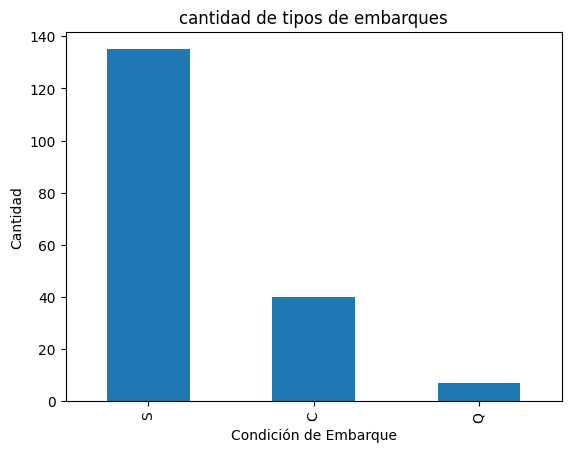

In [4]:
#borramos la columna cabin de los 4 dataset por que en todas falta mas del 50% de los datos
for i in operador:
    i.drop(['Cabin'],axis=1,inplace=True)

#En femaleo20 vemos que tiene 2 datos nulos en la columna Embarked que es 1,1% de los adtos faltantes por lo que se pueden hacer dos cosas.
#analizar los datos de Embarked y ver si esos dos datos se pueden reemplazar con la media o bien eliminar esas 2 personas

#analizamos la distribución de esta variable
femaleo20['Embarked'][:10]
columna_counts = femaleo20['Embarked'].value_counts()
# Graficamos esta variable
columna_counts.plot.bar()
plt.title('cantidad de tipos de embarques')
plt.xlabel('Condición de Embarque')
plt.ylabel('Cantidad')
plt.show()
# para no influir en ningún resultado podemos eliminar las dos variables directamente
for i,dato in femaleo20['Embarked'].items():
    if pd.isna(dato):
        femaleo20.drop(i,inplace=True)        


In [5]:
# controlamos entonces que ningun dataset tiene valores nulos
for i in range(0,4,1):
    datos_faltantes=contar_datos_faltantes(operador[i])
    print(f"verificamos que no tengamos datos nulos en el dataset {etiqueta[i]}:")
    print(datos_faltantes)

# realizamos la estadisticas del dataset
for i in range(0,4,1):
    print(f"información del dataset {etiqueta[i]}:")
    print(operador[i].info())
    print(f"Relaciones entre datos float e int {etiqueta[i]}:")
    print(operador[i].describe())



verificamos que no tengamos datos nulos en el dataset femaleu20:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
verificamos que no tengamos datos nulos en el dataset femaleo20:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
verificamos que no tengamos datos nulos en el dataset maleu20:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
verificamos que no tengamos datos nulos en el dataset maleo20:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket  

In [6]:
datos_corruptos=crear_copia_datos_corruptos(df)
print(datos_corruptos)

     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch        

## Ejercicio 2. Seleccionamos productos del dataset de la French bakery

1 Analice el dataset que contiende la información almacenada en Bakery sales.csv. Analice si hay datos faltantes y haga una limpieza correspondiente.

2 Modifique los valores en la columna unit_price de forma que ya no incluyan el signo del euro.

3 Seleccione un producto de la pandaería y genere un subconjunto del dataset, podría elegir el PAIN, el CROISSANT, etc.

4 Haga un histograma graficando información de una de las columnas.

l5 Almacene los datos de este producto, incluya las columnas {date, time, Quantity, unit_price} y guardelo en un archivo usando np.savez('nombre del producto.npz', ...., ...., ....)


1 Analice el dataset que contiende la información almacenada en Bakery sales.csv. Analice si hay datos faltantes y haga una limpieza correspondiente.

In [7]:
df_original=pd.read_csv('Bakery-sales.csv')

#realizamos una copia para no tocar el original
df=df_original.copy()

#utilizamos función reada para analizar si hay datos nulos
contar_datos_faltantes(df)

df.head()


,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


2 Modifique los valores en la columna unit_price de forma que ya no incluyan el signo del euro.

In [8]:
for index,i in df['unit_price'].items():
    nuevo=i.replace("€","")
    nuevo=nuevo.replace(",",".")
    nuevo=nuevo.strip()
    nuevo=float(nuevo)
    df.at[index, 'unit_price'] = nuevo

df.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.9
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.2
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.2
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,1.15
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.2


In [9]:
# Guardar el DataFrame modificado 
df.to_csv('Bakery-sales-modificado.csv', index=False)

In [10]:
df=pd.read_csv('Bakery-sales-modificado.csv')


3 Seleccione un producto de la pandaería y genere un subconjunto del dataset, podría elegir el PAIN, el CROISSANT, etc.


In [11]:
pain=df.loc[df['article']=='PAIN'].copy()
pain.head(10)


,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,1.15
17,39,2021-01-02,09:46,150051.0,PAIN,1.0,1.15
24,52,2021-01-02,09:49,150054.0,PAIN,2.0,1.15
273,557,2021-01-02,12:46,150182.0,PAIN,1.0,1.15
359,725,2021-01-02,13:49,150223.0,PAIN,1.0,1.15
528,1082,2021-01-03,11:41,150317.0,PAIN,2.0,1.15
531,1091,2021-01-03,11:42,150320.0,PAIN,1.0,1.15
663,1383,2021-01-03,12:48,150400.0,PAIN,1.0,1.15
766,1610,2021-01-04,09:56,150462.0,PAIN,1.0,1.15
786,1646,2021-01-04,10:13,150470.0,PAIN,2.0,1.15


4 Haga un histograma graficando información de una de las columnas.

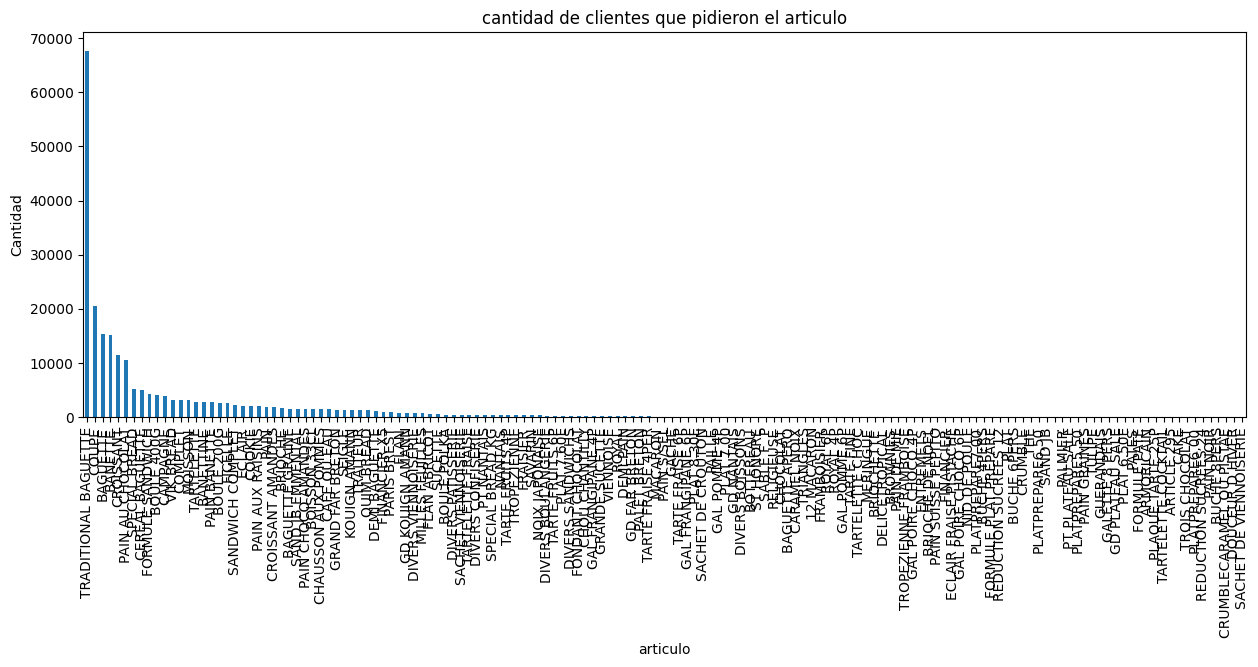

In [12]:
#contamos datos categoricos
columna_counts = df['article'].value_counts()
# Graficamos esta variable
plt.figure(figsize=(15,5))
columna_counts.plot.bar()
plt.title('cantidad de clientes que pidieron el articulo')
plt.xlabel('articulo')
plt.ylabel('Cantidad')
plt.tick_params()
plt.show()


#contamos la cantidad vendida de cada articulo y despues vamos a realizar un histograma

5 Almacene los datos de este producto, incluya las columnas {date, time, Quantity, unit_price} y guardelo en un archivo usando np.savez('nombre del producto.npz', ...., ...., ....)

In [13]:
#eliminamos las columnas que no vamos a necesitar
pain.drop(columns='ticket_number',inplace=True)
pain.drop(columns='article',inplace=True)
pain.head()
np.savez('pain.npz',**pain.to_dict())




In [14]:
pain=np.load('pain.npz')
pain


NpzFile 'pain.npz' with keys: Unnamed: 0, date, time, Quantity, unit_price